### ListeningStatsFlow loads the listening metadata CSV file into a Pandas Dataframe and computes some song specific statistics

In [3]:
from metaflow import Flow, get_metadata
import matplotlib.pyplot as plt
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/home/michel/Code/dz-assessment/exercise1


#### Get the song statistics from the latest run of ListeningStatsFlow

In [5]:
run = Flow('ListeningStatsFlow').latest_successful_run
print("Using run: %s" % str(run))

country_stats = run.data.element_stats

Using run: Run('ListeningStatsFlow/1582654363901673')


#### Bar plot of the total streams for the top countries

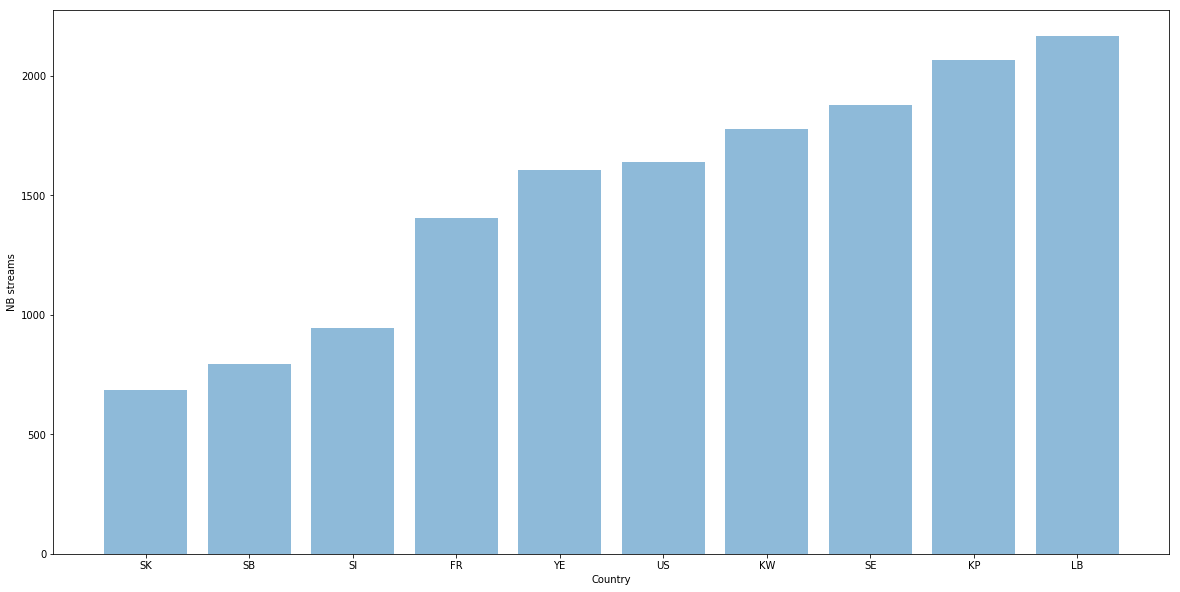

In [6]:
# Get total for each song
data = [(country, data['top_k']['listens'].sum()) for country, data in country_stats.items()]

# Sort and unpack into a list of labels, and totals
country, total = zip(*[(country, total) for country, total in sorted(data, key=lambda pair: pair[1])])

# Create the bar plot
plt.figure(figsize=(20,10))
plt.bar(country[-10:], total[-10:], align='center', alpha=0.5)
plt.xlabel("Country")
plt.ylabel("NB streams")
plt.show()

In [9]:
data = [(country, data['top_k']) for country, data in country_stats.items()]
print(data[1])

('SJ',                       song_id  listens
0  E.T. the Extra-Terrestrial       32
2              The Nutcracker       20
1            Raise Your Voice       14)


In [15]:
df = country_stats['BE']
df

{'top_k':                     song_id  listens
 0  Beyond the Black Rainbow       30
 4             The Happening       22
 5              The Invasion       20
 6                  WarGames       19
 2           Project Almanac       18
 3      The Butterfly Effect       16
 1              Blade Runner        6}